<a href="https://colab.research.google.com/github/sugamadhikari11/Transfer_Learning/blob/main/Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.8948.jpg', 'dog.11517.jpg', 'dog.9444.jpg', 'cat.9784.jpg', 'cat.8708.jpg', 'dog.3349.jpg', 'dog.6472.jpg', 'cat.10325.jpg', 'cat.7261.jpg', 'cat.12445.jpg', 'cat.3088.jpg', 'dog.9204.jpg', 'dog.7553.jpg', 'cat.11255.jpg', 'dog.8909.jpg', 'dog.10382.jpg', 'cat.3197.jpg', 'dog.3011.jpg', 'dog.11325.jpg', 'cat.9303.jpg', 'dog.8957.jpg', 'dog.9228.jpg', 'cat.11455.jpg', 'cat.4718.jpg', 'cat.12327.jpg', 'dog.10093.jpg', 'cat.4948.jpg', 'cat.8556.jpg', 'dog.1573.jpg', 'cat.11436.jpg', 'dog.4472.jpg', 'cat.7833.jpg', 'dog.1187.jpg', 'cat.6663.jpg', 'dog.3116.jpg', 'cat.7926.jpg', 'cat.7441.jpg', 'dog.11262.jpg', 'cat.4579.jpg', 'dog.12476.jpg', 'dog.9831.jpg', 'cat.63.jpg', 'dog.1334.jpg', 'cat.1805.jpg', 'dog.5629.jpg', 'cat.12034.jpg', 'cat.11463.jpg', 'dog.4732.jpg', 'dog.12156.jpg', 'dog.173.jpg', 'dog.10035.jpg', 'dog.5558.jpg', 'cat.1952.jpg', 'dog.8630.jpg', 'cat.6427.jpg', 'cat.2249.jpg', 'dog.8470.jpg', 'dog.7821.jpg', 'dog.1954.jpg', 'dog.8812.jpg', 'dog.9751.jpg', 'dog.12076

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

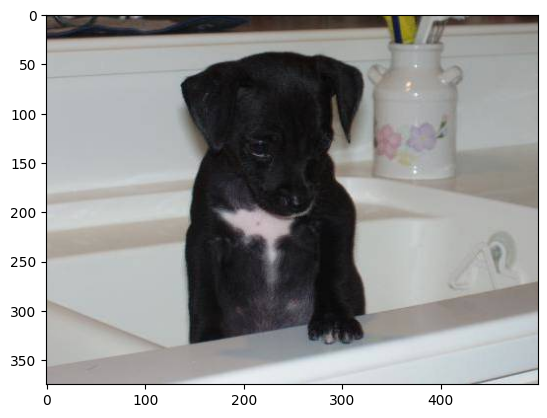

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

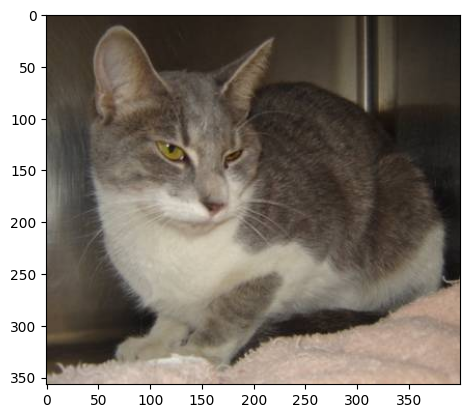

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
dog
dog
cat
cat


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

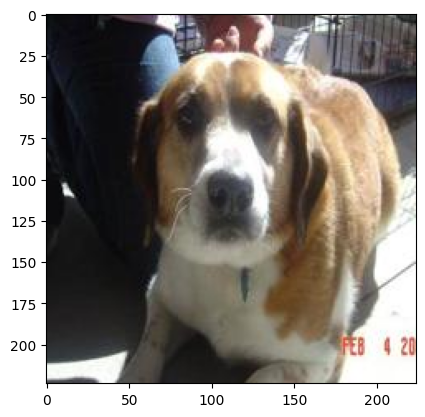

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.11517.jpg')
imgplt = plt.imshow(img)
plt.show()

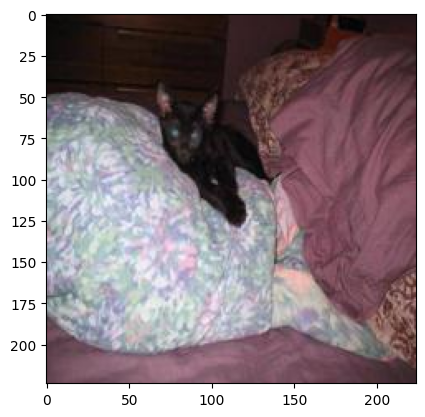

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.8948.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.8948.jpg', 'dog.11517.jpg', 'dog.9444.jpg', 'cat.9784.jpg', 'cat.8708.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 988 1012]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 11  13  14]
   [ 11  13  14]
   [ 11  13  14]
   ...
   [ 22  20  32]
   [ 22  20  32]
   [ 22  20  32]]

  [[  9  11  12]
   [  9  11  12]
   [  9  11  12]
   ...
   [ 22  20  32]
   [ 22  20  32]
   [ 22  20  32]]

  [[  6   8   9]
   [  6   8   9]
   [  8  10  11]
   ...
   [ 23  21  33]
   [ 23  21  33]
   [ 23  21  33]]

  ...

  [[ 78  66  96]
   [ 79  67  97]
   [ 81  69  99]
   ...
   [ 45  39  58]
   [ 45  39  58]
   [ 46  40  59]]

  [[ 77  65  95]
   [ 79  67  97]
   [ 80  68  98]
   ...
   [ 46  39  60]
   [ 46  40  59]
   [ 47  41  60]]

  [[ 77  65  95]
   [ 78  66  96]
   [ 79  67  97]
   ...
   [ 46  39  60]
   [ 47  41  60]
   [ 47  41  60]]]


 [[[  9   9   3]
   [ 12  12   6]
   [ 15  14  10]
   ...
   [ 57  58  54]
   [ 51  52  48]
   [ 51  52  48]]

  [[ 10  10   4]
   [ 13  13   7]
   [ 16  15  11]
   ...
   [ 56  57  53]
   [ 55  56  52]
   [ 58  59  55]]

  [[ 12  12   6]
   [ 15  15   9]
   [ 18  17  13]
   ...
   [ 48  49  45]
   [ 52  53  49]
   [ 54  55

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.46666667 0.53333333 0.58431373]
   [0.47058824 0.5372549  0.58823529]
   [0.47843137 0.54509804 0.59607843]
   ...
   [0.82745098 0.71372549 0.68627451]
   [0.81960784 0.70588235 0.67843137]
   [0.81568627 0.70196078 0.6745098 ]]

  [[0.49019608 0.55686275 0.60784314]
   [0.49019608 0.55686275 0.60784314]
   [0.49019608 0.55686275 0.60784314]
   ...
   [0.82352941 0.70980392 0.68235294]
   [0.81960784 0.70588235 0.67843137]
   [0.81568627 0.70196078 0.6745098 ]]

  [[0.50588235 0.58039216 0.63137255]
   [0.50196078 0.57647059 0.62745098]
   [0.50588235 0.57254902 0.62352941]
   ...
   [0.82352941 0.70980392 0.68235294]
   [0.81960784 0.70588235 0.67843137]
   [0.81960784 0.70588235 0.67843137]]

  ...

  [[0.41568627 0.63137255 0.59607843]
   [0.41960784 0.63529412 0.6       ]
   [0.42352941 0.63921569 0.60392157]
   ...
   [0.25098039 0.24705882 0.3254902 ]
   [0.10196078 0.09803922 0.17647059]
   [0.03529412 0.03137255 0.10980392]]

  [[0.40784314 0.62352941 0.58823529]
   [0.4

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 80s 2s/step - loss: 0.1905 - acc: 0.9306
Epoch 2/5
50/50 [==============================] - 73s 1s/step - loss: 0.0687 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 70s 1s/step - loss: 0.0531 - acc: 0.9812
Epoch 4/5
50/50 [==============================] - 77s 2s/step - loss: 0.0411 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 80s 2s/step - loss: 0.0347 - acc: 0.9919


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0596 - acc: 0.9800
Test Loss = 0.0595744326710701
Test Accuracy = 0.9800000190734863


**Predictive System**

Path of the image to be predicted: /content/cat.png


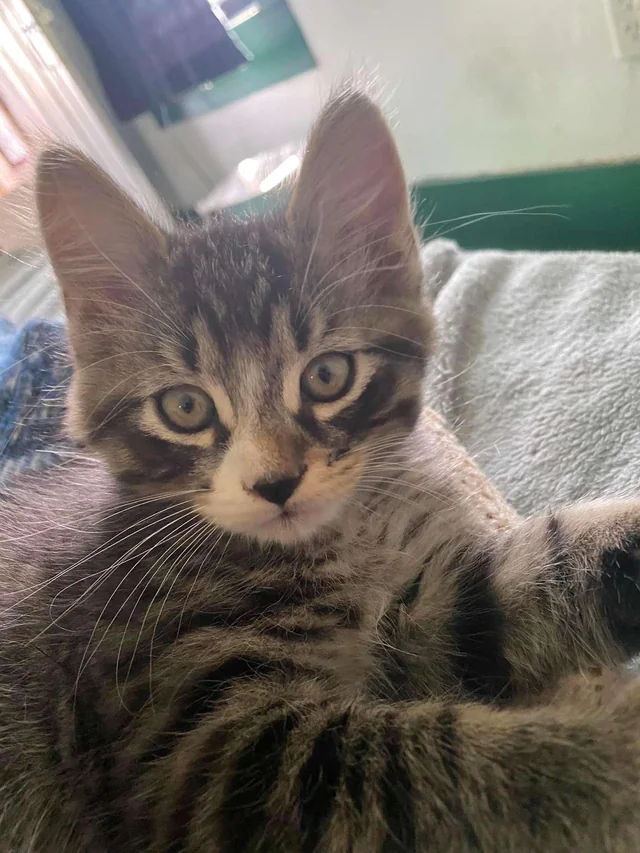

1/1 [==============================] - 1s 715ms/step
[[ 2.5200937 -4.4174485]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


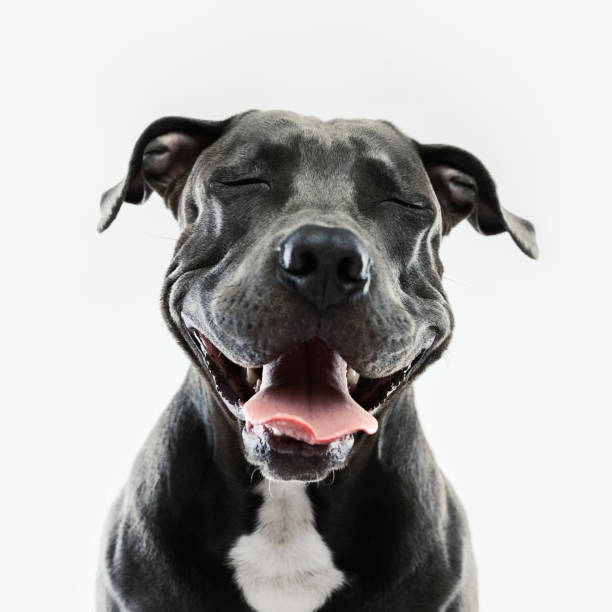

1/1 [==============================] - 0s 63ms/step
[[-3.658022   2.3351955]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')